In [936]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# import math

from IPython.display import display, Math

In [937]:
np.set_printoptions(suppress=True)

In [ ]:
PRECISION = 5

k_ = 8
p_ = 0.7
n_ = 140

# k_ = 3
# p_ = 0.5
# n_ = 160

# k_ = 10
# p_ = 0.4
# n_ = 120

alpha_ = 0.01

In [939]:
factorial = lambda x : sp.special.factorial(x)
Cnk       = lambda n, k : factorial(n) / (factorial(k) * (factorial(n - k)))
# Cnk = lambda n, k : math.comb(n, k)
cout      = lambda name, arr : print(f'{name}:\n {np.round(np.array(arr), PRECISION)}')

In [940]:
def decorate_plot(ax, xticks, loc=(-0.025, -0.3)):
    # Define font sizes
    SIZE_TICKS = 10

    # axis names
    ax.set_xlabel('p')

    ax.set_xticks(xticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    # plt.legend(fontsize=10, loc='lower left')
    plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

    # Adjust layout
    plt.tight_layout()

In [941]:
def B(k, p, n):
    q = 1 - p
    P = [Cnk(k, j) * p**j * (q)**(k - j) for j in range(k+1)]
    # cout('P', P)

    Cumulative_P = [P[i] + sum(P[:i]) for i in range(k+1)]
    # cout('cumulative P', Cumulative_P)

    Y = np.random.uniform(low=0, high=1, size=n)
    # cout('Y', Y)

    def k_alg(u, r):
        i = 0
        for j in range(len(u)):
            if r < u[j]:
                break
            i += 1
        return i
    X = [k_alg(Cumulative_P, Y[j]) for j in range(n)]
    # cout('X', X)

    return X

X = B(k_, p_, n_)
cout(f'B({k_},{p_}) of size {n_}', X)

B(10,0.4) of size 120:
 [4 3 0 4 5 4 4 5 4 4 5 5 5 3 5 6 4 5 3 3 4 2 6 5 4 3 2 4 3 5 8 5 4 3 5 6 3
 3 4 4 4 4 2 1 3 2 3 2 3 3 5 3 5 4 4 5 4 4 4 6 3 6 2 3 2 6 3 3 3 8 5 4 4 5
 2 2 3 2 3 7 4 1 3 3 5 7 5 4 5 6 5 2 5 4 5 2 2 4 5 3 2 5 2 1 4 2 4 6 3 5 7
 2 3 4 4 6 5 3 6 5]


In [942]:
overlineX = 1 / len(X) * sum(X)
display(Math(f'\\overline{{X}}: {overlineX}'))

K_Stat = sum(X)
display(Math(f'K(\\overrightarrow{{X}}_n): {K_Stat}'))

quantile = lambda alpha, n, p : sp.stats.binom.ppf(alpha, n, p) # n * k

<IPython.core.display.Math object>

<IPython.core.display.Math object>

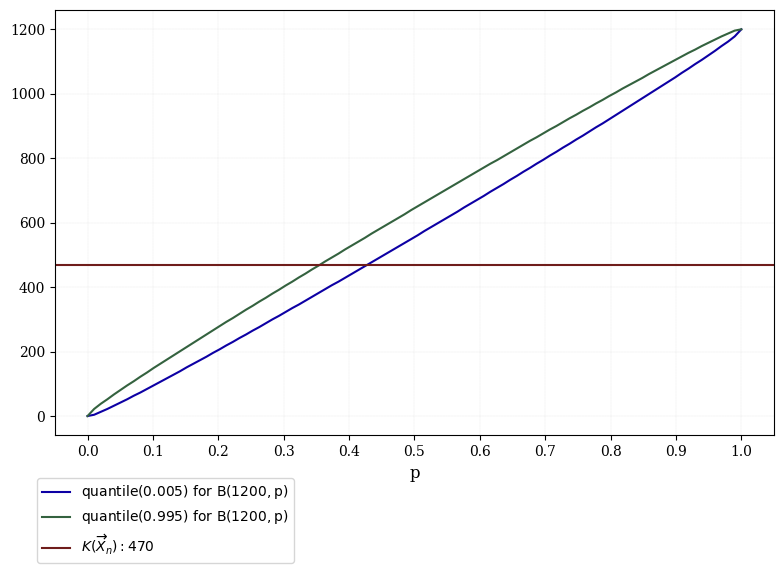

In [943]:
def plot(filename):
    # Define colors
    RED = '#6F1D1B'
    GREEN = '#34623f'
    BLUE = '#0d00a4'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(8, 6))

    # alpha / 2
    alpha = alpha_ / 2
    x_values = np.linspace(0, 1, 100)
    y_values = [quantile(alpha, n_*k_, p) for p in x_values]
    ax.plot(x_values, y_values, color=BLUE, linestyle='-', linewidth=1.5, label=f'$\\text{{quantile}}({alpha})\\text{{ for B}}({n_*k_}, \\text{{p}})$')

    # 1 - alpha / 2
    alpha = 1 - alpha_ / 2
    x_values = np.linspace(0, 1, 100)
    y_values = [quantile(alpha, n_*k_, p) for p in x_values]
    ax.plot(x_values, y_values, color=GREEN, linestyle='-', linewidth=1.5, label=f'$\\text{{quantile}}({alpha})\\text{{ for B}}({n_*k_}, \\text{{p}})$')

    # Draw the horizontal line y = K_Stat
    ax.axhline(y=K_Stat, color=RED, linestyle='-', label=f'$K(\\overrightarrow{{X}}_n): {K_Stat}$')

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 1+0.1, 0.1))

    # Save the figure
    # plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    plt.grid(linestyle='--', linewidth=0.1)

    # Show the plot
    plt.show()

plot('quantiles')

In [944]:
# numerically

alphas_ = [0.1, 0.05, 0.02] + [alpha_] 

for alpha in alphas_:

    foo1 = lambda p : quantile(1 - alpha / 2, n_*k_, p) - K_Stat
    foo2 = lambda p : quantile(alpha/2, n_*k_, p) - K_Stat

    underlineP = sp.optimize.brentq(foo1, 0, 1, xtol=1e-6)
    overlineP  = sp.optimize.brentq(foo2, 0, 1, xtol=1e-6)

    print(f'{alpha}: {underlineP}       {alpha}: {overlineP}')

0.1: 0.36883137119787895       0.1: 0.414737647681848
0.05: 0.36432007100824976       0.05: 0.41913184730991465
0.02: 0.35917188631413965       0.02: 0.42446902622604266
0.01: 0.35570108065120104       0.01: 0.42806792005172806


In [945]:
# Klopper-Pirson

for alpha in alphas_:
    underlineP = lambda alpha : sp.stats.beta.ppf(alpha/2,   K_Stat,     n_ * k_ - K_Stat + 1)
    overlineP  = lambda alpha : sp.stats.beta.ppf(1-alpha/2, K_Stat + 1, n_ * k_ - K_Stat)

    print(f'{alpha}: {underlineP(alpha)}       {alpha}: {overlineP(alpha)}')

0.1: 0.3682877857900662       0.1: 0.4154397655032848
0.05: 0.3639266254218461       0.05: 0.4199390258555975
0.02: 0.35887505970470657       0.02: 0.42518101896428934
0.01: 0.3554475211940011       0.01: 0.42875656019933006


In [946]:
# CPT

def find_p(alpha):
    SE = np.sqrt(overlineX * (k_ - overlineX) / (n_ * k_)) / k_

    quantile = sp.stats.norm.ppf(alpha / 2)

    lowerBound = overlineX / k_ + quantile * SE
    upperBound = overlineX / k_ - quantile * SE

    return (lowerBound, upperBound)

for alpha in alphas_:
    underlineP, overlineP = find_p(alpha)
    print(f'{alpha}: {underlineP}       {alpha}: {overlineP}')

0.1: 0.3684892116559123       0.1: 0.414844121677421
0.05: 0.3640490256012005       0.05: 0.4192843077321328
0.02: 0.3588863497396965       0.02: 0.4244469835936368
0.01: 0.35537093383052615       0.01: 0.4279623995028072


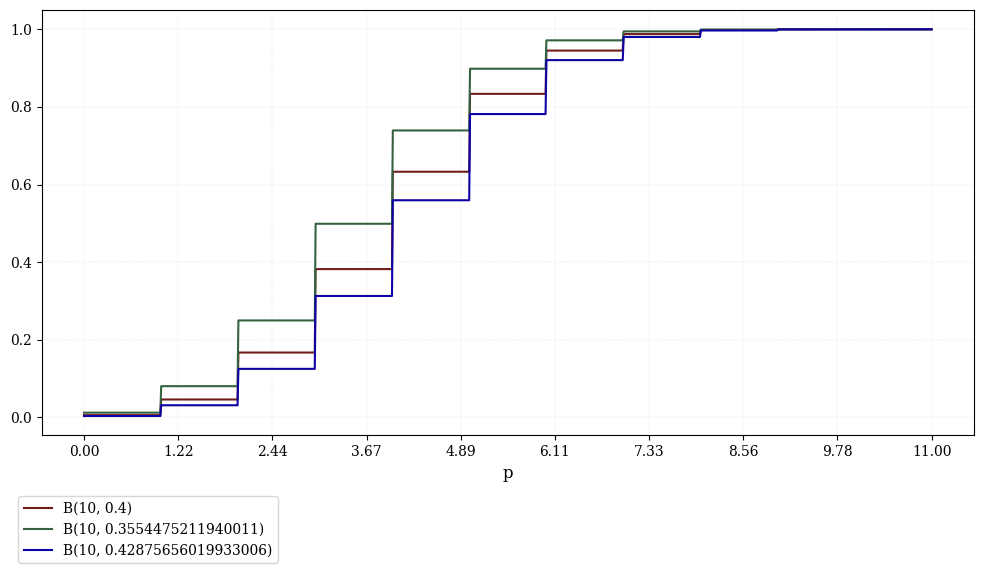

In [947]:
def plot(filename):
    # Define colors
    RED = '#6F1D1B'
    GREEN = '#34623f'
    BLUE = '#0d00a4'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    underlineP = lambda alpha : sp.stats.beta.ppf(alpha/2,   K_Stat,     n_ * k_ - K_Stat + 1)
    overlineP  = lambda alpha : sp.stats.beta.ppf(1-alpha/2, K_Stat + 1, n_ * k_ - K_Stat)

    x_values = np.linspace(0, k_+1, 1000)
    
    # B(k, p)
    y_values = sp.stats.binom.cdf(x_values, k_, p_)
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5, label=f'B({k_}, {p_})')
    
    # B(k, underline p)
    p = underlineP(alpha_)
    y_values = sp.stats.binom.cdf(x_values, k_, p)
    ax.plot(x_values, y_values, color=GREEN, linestyle='-', linewidth=1.5, label=f'B({k_}, {p})')

    # B(k, overline p)
    p = overlineP(alpha_)
    y_values = sp.stats.binom.cdf(x_values, k_, p)
    ax.plot(x_values, y_values, color=BLUE, linestyle='-', linewidth=1.5, label=f'B({k_}, {p})')

    # Call the decoration function
    decorate_plot(ax, np.linspace(0, k_+1, 10))

    # Save the figure
    # plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    plt.grid(linestyle='--', linewidth=0.1)

    # Show the plot
    plt.show()

plot('B_step')